In [1]:
#pip install boto3

In [2]:
#pip install s3fs

In [3]:
import configparser
import boto3
import s3fs
import pandas as pd

In [4]:
config = configparser.ConfigParser()
config.read('aws.cfg')

aws_access_key = config['AWS']['aws_access_key_id']
aws_secret_key = config['AWS']['aws_secret_access_key']

In [5]:
s3 = boto3.client(
    's3',
    aws_access_key_id=aws_access_key,
    aws_secret_access_key=aws_secret_key
)

In [6]:
df = pd.read_csv('s3://techcatalyst-public/resources/sentiment/product.csv')

In [7]:
df.head()

,PRODUCT ID,PRODUCT DESCRIPTION,REVIEW ID
0,1,High-quality smartphone with excellent camera.,R1
1,1,High-quality smartphone with excellent camera.,R2
2,2,Durable laptop with long battery life.,R3
3,2,Durable laptop with long battery life.,R4
4,3,Wireless noise-canceling headphones.,R5


In [8]:
df1 = pd.read_csv('s3://techcatalyst-public/resources/sentiment/review.csv')

In [9]:
df1.head()

,REVIEW ID,REVIEW TEXT
0,R1,"Great camera quality, but battery life could b..."
1,R2,Very satisfied with this smartphone. Worth eve...
2,R3,Excellent performance and battery life. Highly...
3,R4,Disappointed with the build quality. Feels cheap.
4,R5,Fantastic noise cancellation and sound quality.


In [10]:
df_combined = df.merge(df1)

In [11]:
df_combined.head()

,PRODUCT ID,PRODUCT DESCRIPTION,REVIEW ID,REVIEW TEXT
0,1,High-quality smartphone with excellent camera.,R1,"Great camera quality, but battery life could b..."
1,1,High-quality smartphone with excellent camera.,R2,Very satisfied with this smartphone. Worth eve...
2,2,Durable laptop with long battery life.,R3,Excellent performance and battery life. Highly...
3,2,Durable laptop with long battery life.,R4,Disappointed with the build quality. Feels cheap.
4,3,Wireless noise-canceling headphones.,R5,Fantastic noise cancellation and sound quality.


In [12]:
comprehend = boto3.client('comprehend',
                          'us-west-2',
                          aws_access_key_id=aws_access_key,
                          aws_secret_access_key=aws_secret_key)

In [13]:
sentiments = []
for text in df_combined['REVIEW TEXT']:
    response = comprehend.detect_sentiment(Text=text, LanguageCode='en')
    sentiments.append(response['Sentiment'])

In [14]:
sentiments

['MIXED',
 'POSITIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'MIXED',
 'POSITIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE']

In [15]:
df_combined.loc[:, 'sentiments'] = sentiments

In [16]:
df_combined.head()

,PRODUCT ID,PRODUCT DESCRIPTION,REVIEW ID,REVIEW TEXT,sentiments
0,1,High-quality smartphone with excellent camera.,R1,"Great camera quality, but battery life could b...",MIXED
1,1,High-quality smartphone with excellent camera.,R2,Very satisfied with this smartphone. Worth eve...,POSITIVE
2,2,Durable laptop with long battery life.,R3,Excellent performance and battery life. Highly...,POSITIVE
3,2,Durable laptop with long battery life.,R4,Disappointed with the build quality. Feels cheap.,NEGATIVE
4,3,Wireless noise-canceling headphones.,R5,Fantastic noise cancellation and sound quality.,POSITIVE


In [17]:
import matplotlib.pyplot as plt

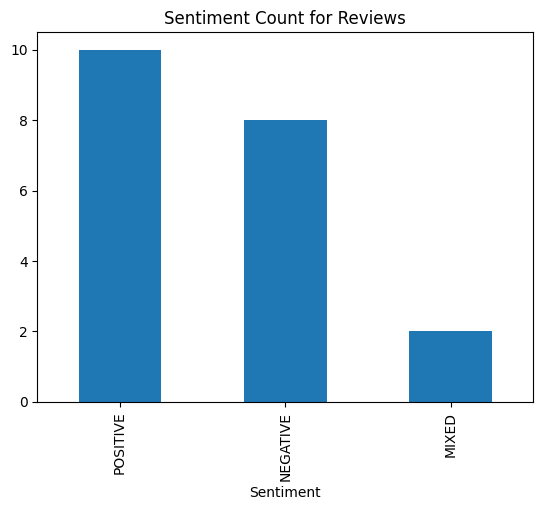

In [18]:
ax1 = df_combined['sentiments'].value_counts().plot(kind="bar")
ax1 = plt.title("Sentiment Count for Reviews")
ax1 = plt.xlabel("Sentiment")

plt.savefig("sentiment_count.jpg", format='jpg')
 
s3.upload_file('sentiment_count.jpg', 'techcatalyst-public', 'irecine/sentiment_count.jpg')

In [19]:
df_combined.to_csv('s3://techcatalyst-public/irecine/product_sentiment.csv', index=False)

# Rekognition

In [24]:
rekognition = boto3.client('rekognition',
                          'us-west-2',
                          aws_access_key_id=aws_access_key,
                          aws_secret_access_key=aws_secret_key)